<a href="https://colab.research.google.com/github/DenisKai7/GroUp/blob/ml-training/GroUp_stunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset dari github

In [ ]:
!git clone https://github.com/DenisKai7/GroUp.git

Cloning into 'GroUp'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 335 (delta 51), reused 117 (delta 31), pack-reused 168 (from 1)
Receiving objects: 100% (335/335), 1.43 MiB | 10.16 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [ ]:
%cd GroUp
!git checkout dataset

/content/GroUp
Branch 'dataset' set up to track remote branch 'dataset' from 'origin'.
Switched to a new branch 'dataset'


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7944 - loss: 0.4797 - val_accuracy: 0.8050 - val_loss: 0.4480
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.4301 - val_accuracy: 0.8156 - val_loss: 0.4433
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8268 - loss: 0.4132 - val_accuracy: 0.8125 - val_loss: 0.4434
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8238 - loss: 0.4223 - val_accuracy: 0.8175 - val_loss: 0.4396
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8328 - loss: 0.4152 - val_accuracy: 0.8156 - val_loss: 0.4365
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8156 - loss: 0.4369 - val_accuracy: 0.8225 - val_loss: 0.4332
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8224 - loss: 0.4223 - val_accuracy: 0.8225 - val_loss: 0.4331
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8280 - loss: 0.4147 - val_accuracy: 0.8256 - val_

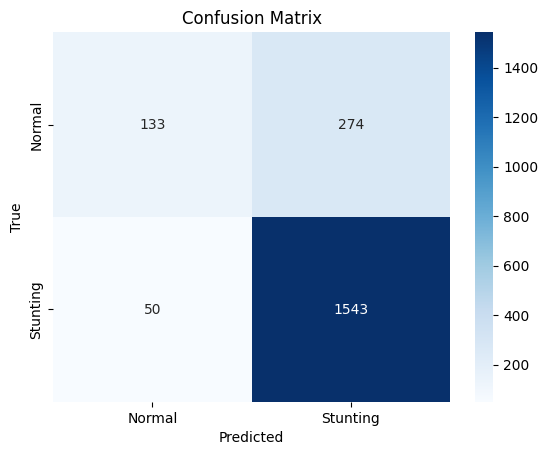

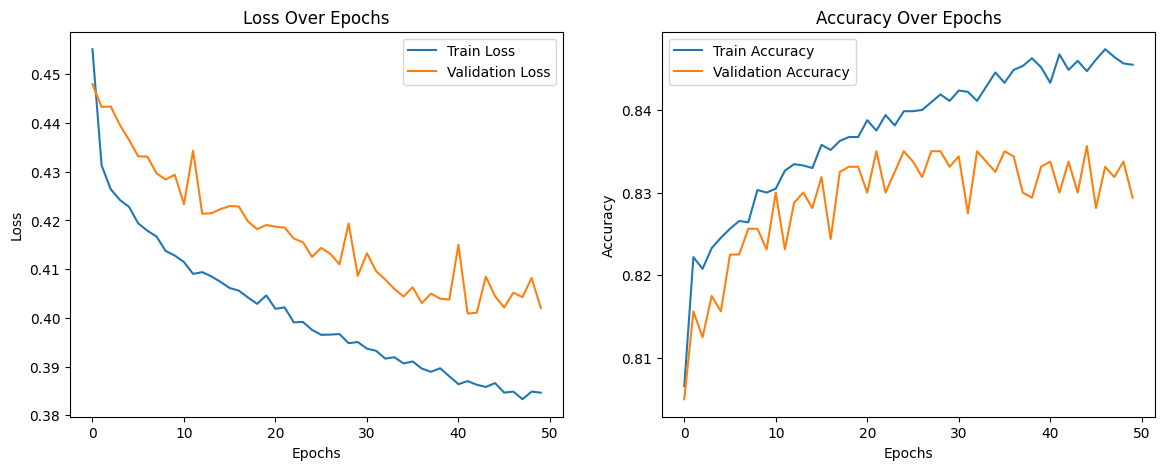

Nama Balita: jay
Usia (bulan): 10
Berat Badan (kg): 5
Tinggi Badan (cm): 65
Jenis Kelamin (Male/Female): male
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Nama: jay
Status: Stunting


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load Data
data = pd.read_csv("/content/GroUp/Stunting_Dataset.csv")
data['Stunting'] = data['Stunting'].apply(lambda x: 1 if x == 'Yes' else 0)

# Features and Target
X = data[['Age', 'Body Weight', 'Body Length', 'Gender']].copy()
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
y = data['Stunting']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Stunting'], yticklabels=['Normal', 'Stunting'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Loss and Accuracy Visualization
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()


# Application Interface
def predict_stunting(age, weight, height, gender):
    gender = 1 if gender.lower() == 'male' else 0
    input_data = scaler.transform([[age, weight, height, gender]])
    prediction = model.predict(input_data)
    status = 'Stunting' if prediction > 0.7 else 'Normal'
    return status


name = input("Nama Balita: ")
age = int(input("Usia (bulan): "))
weight = float(input("Berat Badan (kg): "))
height = float(input("Tinggi Badan (cm): "))
gender = input("Jenis Kelamin (Male/Female): ")

status = predict_stunting(age, weight, height, gender)
print(f"Nama: {name}\nStatus: {status}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Kasus Serupa:
usia : 7.0
jenis kelamin : Male
tinggi badan : 63.0
berat badan : 2.9
status : Stunting
----
usia : 7.0
jenis kelamin : Male
tinggi badan : 63.0
berat badan : 2.9
status : Stunting
----
usia : 7.0
jenis kelamin : Male
tinggi badan : 63.0
berat badan : 2.9
status : Stunting
----


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


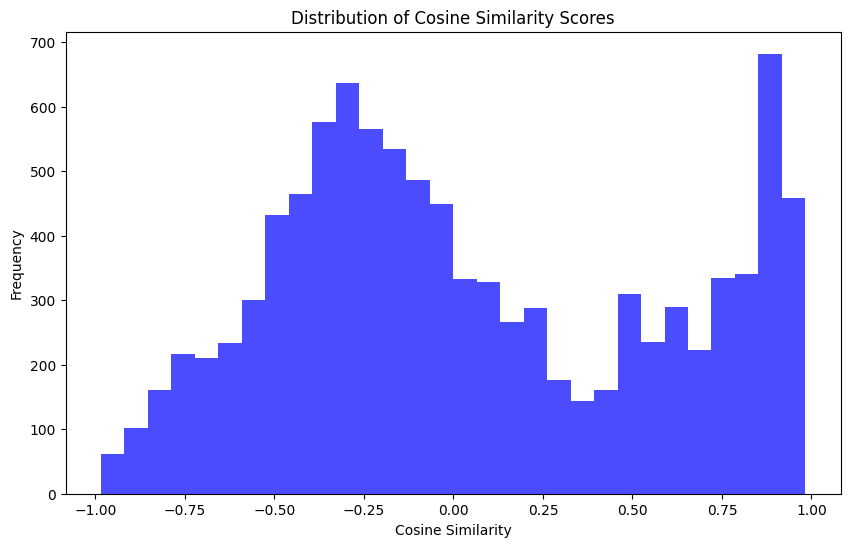

In [4]:
from tensorflow.keras.metrics import CosineSimilarity

# Function to find similar cases
def find_similar_cases(age, weight, height, gender, n_cases=3):
    # Preprocess input
    gender = 1 if gender.lower() == 'male' else 0
    input_data = scaler.transform([[age, weight, height, gender]])

    # Normalize existing dataset
    dataset_scaled = scaler.transform(X)

    # Calculate cosine similarity
    cosine_sim = tf.keras.metrics.CosineSimilarity()
    similarities = []
    for idx, case in enumerate(dataset_scaled):
        cosine_sim.reset_state()
        cosine_sim.update_state(input_data, [case])
        similarities.append((cosine_sim.result().numpy(), idx))

    # Sort by similarity and get top N cases
    similarities = sorted(similarities, key=lambda x: x[0], reverse=True)
    top_cases = similarities[:n_cases]

    # Collect results
    results = []
    for _, idx in top_cases:
        case = X.iloc[idx]
        result = {
            "usia": case['Age'],
            "jenis kelamin": 'Male' if case['Gender'] == 1 else 'Female',
            "tinggi badan": case['Body Length'],
            "berat badan": case['Body Weight'],
            "status": 'Stunting' if y.iloc[idx] == 1 else 'Normal'
        }
        results.append(result)
    return results

# Example Usage
similar_cases = find_similar_cases(age, weight, height, gender)
print("Kasus Serupa:")
for case in similar_cases:
    for key, value in case.items():
        print(f"{key} : {value}")
    print("----")

# Visualize similarity distribution
def visualize_similarity(age, weight, height, gender):
    gender = 1 if gender.lower() == 'male' else 0
    input_data = scaler.transform([[age, weight, height, gender]])
    dataset_scaled = scaler.transform(X)

    # Compute similarities
    similarities = []
    for case in dataset_scaled:
        cosine_sim = CosineSimilarity()
        similarity = cosine_sim(input_data, [case]).numpy()
        similarities.append(similarity)

    # Plot similarity distribution
    plt.figure(figsize=(10, 6))
    plt.hist(similarities, bins=30, color='blue', alpha=0.7)
    plt.title("Distribution of Cosine Similarity Scores")
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Frequency")
    plt.show()

# Example Visualization
visualize_similarity(age, weight, height, gender)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1.0476 - mae: 0.7279 - val_loss: 1.0007 - val_mae: 0.7130
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9863 - mae: 0.7068 - val_loss: 1.0008 - val_mae: 0.7137
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9971 - mae: 0.7112 - val_loss: 1.0005 - val_mae: 0.7132
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.0029 - mae: 0.7125 - val_loss: 1.0017 - val_mae: 0.7135
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.0051 - mae: 0.7112 - val_loss: 1.0004 - val_mae: 0.7131
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.0024 - mae: 0.7113 - val_loss: 1.0008 - val_mae: 0.7139
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0167 - mae: 0.7182 - val_loss: 1.0022 - val_mae: 0.7148
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0013 - mae: 0.7102 - val_loss: 1.0012 - val_mae: 0.7136
Epoch 9/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

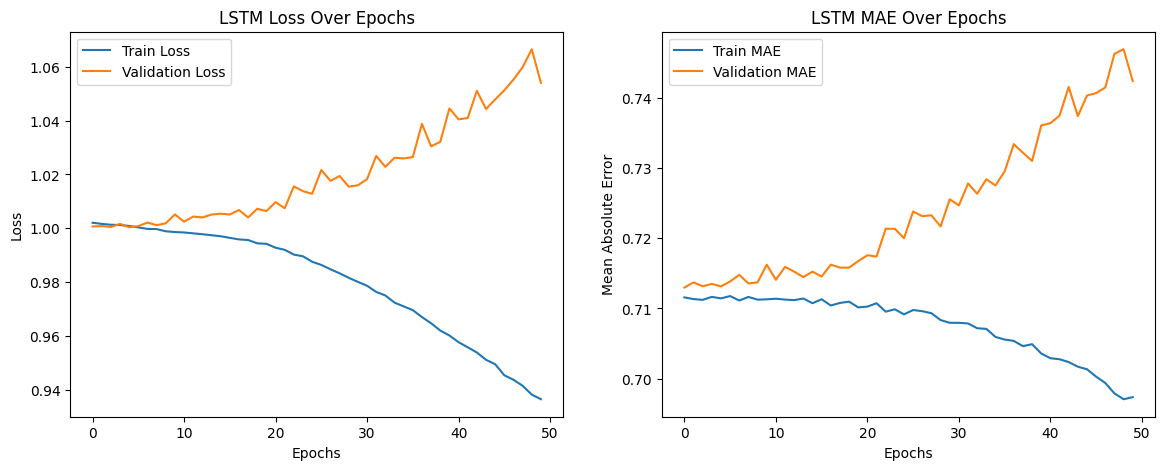

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Data
data = pd.read_csv("/content/GroUp/Stunting_Dataset.csv")
data['Stunting'] = data['Stunting'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# StandardScaler for Weight and Height
scaler_weight_height = StandardScaler()
scaled_weight_height = scaler_weight_height.fit_transform(data[['Body Weight', 'Body Length']].values)

# Prepare Data for LSTM
def prepare_lstm_data(X, y, look_back=1):
    data_X, data_y = [], []
    for i in range(len(X) - look_back):
        data_X.append(X[i:i + look_back])
        data_y.append(y[i + look_back])
    return np.array(data_X), np.array(data_y)

# Create Sequential Data for LSTM
look_back = 3
X_seq, y_seq = prepare_lstm_data(scaled_weight_height, scaled_weight_height, look_back)

# Train-Test Split
X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build LSTM Model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(look_back, X_seq.shape[2]), return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(2)  # Predict 2 features: weight and height
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train LSTM Model
lstm_history = lstm_model.fit(X_seq_train, y_seq_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# Evaluate LSTM Model
test_loss, test_mae = lstm_model.evaluate(X_seq_test, y_seq_test, verbose=0)
print(f"LSTM Test MAE: {test_mae:.2f}")

# Prediction Function for Future Growth
def predict_future_growth(weight, height, status):
    # Scale only weight and height
    scaled_input = scaler_weight_height.transform([[weight, height]])  # Scale weight and height only
    input_seq = np.tile(scaled_input, (look_back, 1))  # Repeat scaled input for look_back steps
    input_seq = input_seq.reshape((1, look_back, 2))  # Reshape to (1, time_steps, features)

    # Predict growth
    predicted_growth = lstm_model.predict(input_seq)
    weight_3mo, height_3mo = scaler_weight_height.inverse_transform(predicted_growth)[0]

    # Adjust predictions based on status
    if status == "Stunting":
        weight_3mo *= 0.9  # Assume slower weight gain (90%)
        height_3mo *= 0.95  # Assume slower height gain (95%)
    elif status == "Normal":
        weight_3mo *= 1.1  # Assume faster weight gain (110%)
        height_3mo *= 1.05  # Assume faster height gain (105%)

    return {
        "status": status,
        "predicted_weight": weight_3mo,
        "predicted_height": height_3mo
    }

# Visualization Function
def plot_lstm_history(history):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('LSTM Loss Over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.title('LSTM MAE Over Epochs')

    plt.show()

# Example Input for Prediction
name = input("Nama Balita: ")
age = int(input("Usia (bulan): "))
weight = float(input("Berat Badan (kg): "))
height = float(input("Tinggi Badan (cm): "))
gender = input("Jenis Kelamin (Male/Female): ")

# Predict for Stunting
stunting_result = predict_future_growth(weight, height, "Stunting")
print(f"\nStatus: {stunting_result['status']}")
print(f"Tinggi Badan (3 bulan ke depan): {stunting_result['predicted_height']:.2f} cm")
print(f"Berat Badan (3 bulan ke depan): {stunting_result['predicted_weight']:.2f} kg")

# Predict for Normal
normal_result = predict_future_growth(weight, height, "Normal")
print(f"\nStatus: {normal_result['status']}")
print(f"Tinggi Badan (3 bulan ke depan): {normal_result['predicted_height']:.2f} cm")
print(f"Berat Badan (3 bulan ke depan): {normal_result['predicted_weight']:.2f} kg")

# Visualize LSTM Model Training
plot_lstm_history(lstm_history)
